In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import pandas as pd
from scipy.interpolate import UnivariateSpline
from scipy.signal import find_peaks

#Ввод данных в ходе эксперимента. Задача на титрование фосфорной кислоты методом косвенной потенциометрии

V = [1, 1.15, 1.35, 1.6, 1.75, 1.90, 2.15, 2.25, 2.35, 2.40, 2.55, 2.65, 2.75, 2.95, 3.00,
     3.15, 3.30, 3.40, 4.00, 4.46, 4.80,5.00,5.2,5.5, 5.60,5.8, 6.00, 6.20, 6.60, 6.8]

pH = [3.12, 3.17, 3.23, 3.3, 3.38, 3.49, 3.62, 3.71, 3.82, 3.98, 4.22, 4.75, 5.54, 5.88, 6.16, 6.35, 6.50,
      6.59, 6.95, 7.19, 7.45,7.74,8.2, 8.5 ,8.79, 9.3, 10.31, 10.58, 10.91, 11]



In [3]:
#таблицы значений. Вывод отношения изм. рН к изм. V
delta_V = [V[i] - V[i-1] for i in range(1, len(V))]
delta_pH= [pH[i] - pH[i-1] for i in range(1, len(pH))]
delta_val = [round(dp / dv, 2) for dp, dv in zip(delta_pH, delta_V)]

data = {'V': V[1:], 'pH': pH[1:], '∆pH/∆V': delta_val}
df = pd.DataFrame(data).T
df.head()


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
V,1.15,1.35,1.60,1.75,1.90,2.15,2.25,2.35,2.40,2.55,...,4.80,5.00,5.2,5.5,5.60,5.80,6.00,6.20,6.60,6.80
pH,3.17,3.23,3.30,3.38,3.49,3.62,3.71,3.82,3.98,4.22,...,7.45,7.74,8.2,8.5,8.79,9.30,10.31,10.58,10.91,11.00
∆pH/∆V,0.33,0.30,0.28,0.53,0.73,0.52,0.90,1.10,3.20,1.60,...,0.76,1.45,2.3,1.0,2.90,2.55,5.05,1.35,0.83,0.45


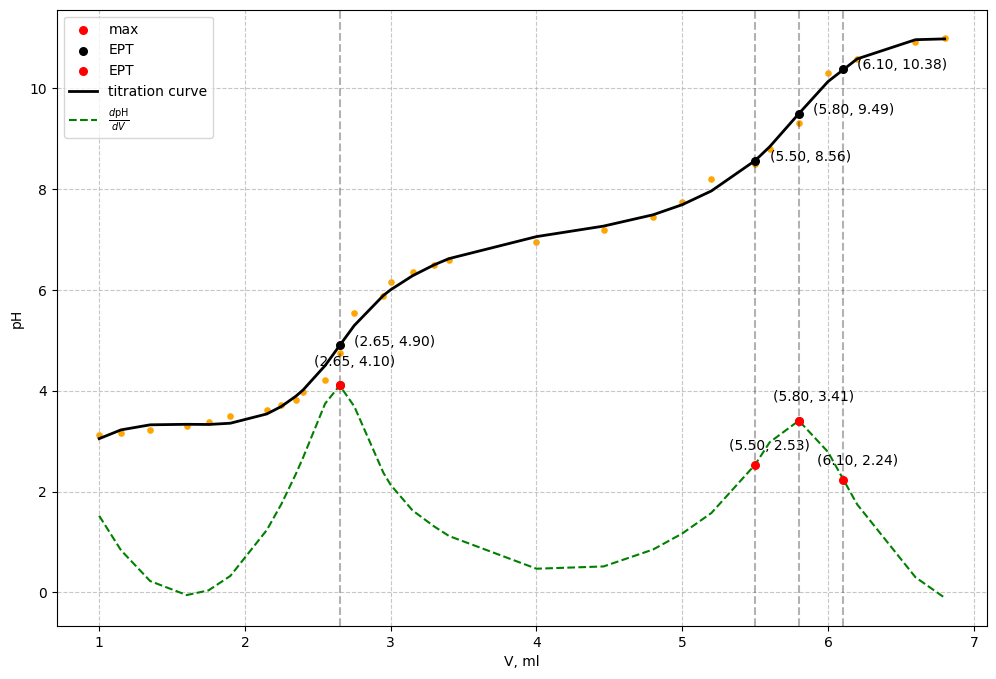

In [7]:
plt.figure(figsize=(12,8))
us = UnivariateSpline(V, pH, s=0.4)
peaks, _ = find_peaks(us(V, 1))
plt.scatter(np.array(V)[peaks], us(V, 1)[peaks], c='red', s=30, zorder=5, label = 'max')
max_values = us(V, 1)[peaks]

for i, (x, y) in enumerate(zip(np.array(V)[peaks], max_values)):
    plt.text(x+0.1, y+0.4, f'({x:.2f}, {y:.2f})', fontsize=10, ha='center', zorder = 10)

x_intersect = [2.65, 5.8, 6.1, 5.5]
y_intersect =us(x_intersect)
y1 = us(x_intersect, 1)
plt.scatter(x_intersect, y_intersect, c='black', s=30, zorder=5, label='EPT')
plt.scatter(x_intersect, y1, c='red', s=30, zorder=5, label='EPT')

for x, y in zip(x_intersect, y_intersect):
    plt.text(x + 0.1, y, f'({x:.2f}, {y:.2f})', fontsize=10, ha='left')
for x, y in zip(x_intersect[2:], y1[2:]):
  plt.text(x + 0.1, y+0.3, f'({x:.2f}, {y:.2f})', fontsize=10, ha='center')

for i in range(len(x_intersect)):
  plt.axvline(x = x_intersect[i], c = 'black', alpha = 0.3, ls = '--')

plt.scatter(V, pH, c='orange', s = 14)
plt.plot(V, us(V), lw = 2, c = 'black', label = 'titration curve')
plt.plot(V, us(V, 1), ls = '--',c = 'green', label = r'$\frac{d\text{pH}}{dV}$')
plt.xlabel('V, ml')
plt.ylabel('pH')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)


$$ m = V_{EPT}cV_{0}/1000V_3$$


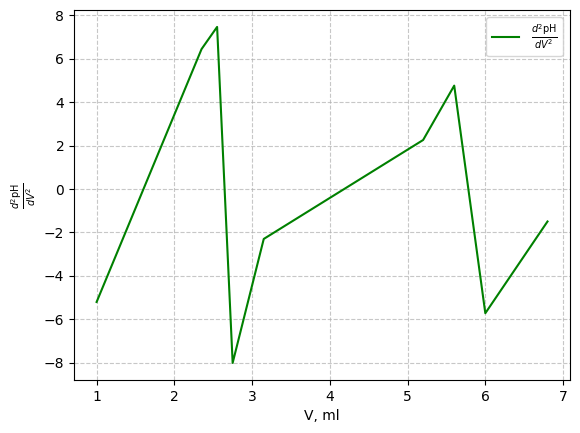

In [8]:
#Вторая производная
plt.plot(V, us(V, 2),c = 'green', label = r'$\frac{d^2\text{pH}}{dV^2}$')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel(r'$\frac{d^2\text{pH}}{dV^2}$')
plt.xlabel('V, ml')
plt.legend()
plt.show()